In [1]:
import pandas as pd

#FEATURE ENGINEERING

In [3]:
advert=pd.read_csv("C:/Users/me/Desktop/Data Science/Machine Learning/SocialNetworkAdvertisementCommas.csv")

In [4]:
advert.describe()

,User ID,Age,No of purchases
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,37.655000,20.720000
std,7.165832e+04,10.482877,16.093916
min,1.556669e+07,18.000000,0.000000
25%,1.562676e+07,29.750000,4.000000
50%,1.569434e+07,37.000000,20.000000
75%,1.575036e+07,46.000000,35.000000
max,1.581524e+07,60.000000,50.000000


In [5]:
advert.head(6)

,User ID,Gender,Age,EstimatedSalary,No of purchases
0,15624510,Male,19,"19,000",21
1,15810944,Male,35,"20,000",44
2,15668575,Female,26,"43,000",0
3,15603246,Female,27,"57,000",4
4,15804002,Male,19,"76,000",37
5,15728773,Male,27,"58,000",8


#removing commas from Estimated salary

In [6]:
advert["EstimatedSalary"]=advert["EstimatedSalary"].str.replace(",","")
advert.head(5)

,User ID,Gender,Age,EstimatedSalary,No of purchases
0,15624510,Male,19,19000,21
1,15810944,Male,35,20000,44
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,4
4,15804002,Male,19,76000,37


In [7]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null object
No of purchases    400 non-null int64
dtypes: int64(3), object(2)
memory usage: 15.7+ KB


In [8]:
advert["EstimatedSalary"]=pd.to_numeric(advert["EstimatedSalary"])

In [9]:
advert["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

#Creating new column & Inputing 0 or 1

In [10]:
advert["Purchase"]=0
advert.head(6)

,User ID,Gender,Age,EstimatedSalary,No of purchases,Purchase
0,15624510,Male,19,19000,21,0
1,15810944,Male,35,20000,44,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,4,0
4,15804002,Male,19,76000,37,0
5,15728773,Male,27,58000,8,0


In [11]:
advert.loc[advert["No of purchases"]>0,"Purchase"]=1
advert.head(6)

,User ID,Gender,Age,EstimatedSalary,No of purchases,Purchase
0,15624510,Male,19,19000,21,1
1,15810944,Male,35,20000,44,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,4,1
4,15804002,Male,19,76000,37,1
5,15728773,Male,27,58000,8,1


In [13]:
advert=advert.drop(columns=["No of purchases"],axis=1)#droping column "No of purchases"

In [17]:
advert.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchase
0,15624510,Male,19,19000,1
1,15810944,Male,35,20000,1
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,1
4,15804002,Male,19,76000,1
5,15728773,Male,27,58000,1


Plotting with seaborn

In [18]:
import seaborn as sns

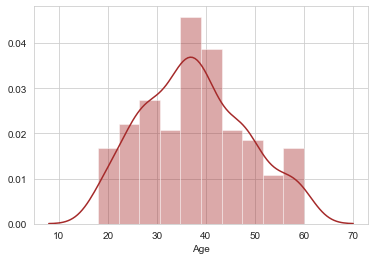

In [31]:
#darkgrid--dark squares,ticks--without the lines of grid,whitegrid--with lines
sns.set_style("whitegrid")
sns.set_color_codes()
sns.distplot(advert["Age"],color="brown")

Binning (i.e Grouping)

In [48]:
advert["Binned Age"]=pd.cut(advert["Age"],bins=[15,25,35,45,55])
advert["Binned AgeLabels"]=pd.cut(advert["Age"],bins=[15,25,35,45,55],labels=["Millenials","Generation X","Baby Boomers","Silent Generation"])

In [49]:
advert.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchase,Binned Age,Binned AgeLabels
0,15624510,Male,19,19000,1,"(15, 25]",Millenials
1,15810944,Male,35,20000,1,"(25, 35]",Generation X
2,15668575,Female,26,43000,0,"(25, 35]",Generation X
3,15603246,Female,27,57000,1,"(25, 35]",Generation X
4,15804002,Male,19,76000,1,"(15, 25]",Millenials
5,15728773,Male,27,58000,1,"(25, 35]",Generation X
6,15598044,Female,27,84000,1,"(25, 35]",Generation X
7,15694829,Female,32,150000,1,"(25, 35]",Generation X
8,15600575,Male,25,33000,1,"(15, 25]",Millenials
9,15727311,Female,35,65000,1,"(25, 35]",Generation X


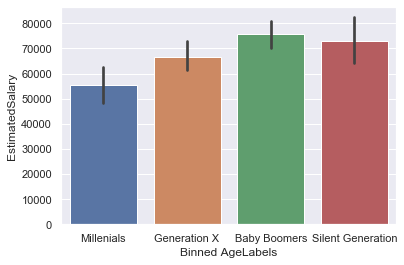

In [51]:
sns.set(style="darkgrid")
sns.barplot(x=advert["Binned AgeLabels"],y=advert["EstimatedSalary"])

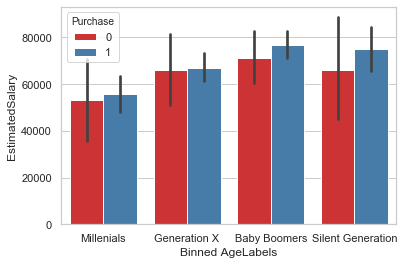

In [80]:
sns.set(style="whitegrid")
sns.barplot(x=advert["Binned AgeLabels"],y=advert["EstimatedSalary"],hue=advert["Purchase"],palette="Set1")
